In [1]:
import pymolzilla.processing as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=8) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=8) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend

In [4]:
f1 = pm.cofe_room_t()
f2 = pm.cofe_low_t()
f1.df.drop(7, inplace=True)

In [7]:
f1.load()
f1.preprocess()
f1.process()
f2.load()
f2.preprocess()
f2.process()

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8
loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8


In [8]:
print('analyzing rt')
f1.analyze()
print('analyzing lowt')
f2.analyze()

analyzing rt
analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
postprocessing
analyzing lowt
analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
postprocessing


In [19]:
df1 = pd.DataFrame(f1.df['wavelength'])
df1['ku'] = f1.df['k_canon'].apply(lambda r: r['ku'])
df1['phiu'] = f1.df['k_canon'].apply(lambda r: r['phiu'])
df1['kc'] = f1.df['k_canon'].apply(lambda r: r['kc'])
df1['phic'] = f1.df['k_canon'].apply(lambda r: r['phic'])

df2 = pd.DataFrame(f2.df['wavelength'])
df2['ku'] = f2.df['k_canon'].apply(lambda r: r['ku'])
df2['phiu'] = f2.df['k_canon'].apply(lambda r: r['phiu'])
df2['kc'] = f2.df['k_canon'].apply(lambda r: r['kc'])
df2['phic'] = f2.df['k_canon'].apply(lambda r: r['phic'])

In [20]:
df1

,wavelength,ku,phiu,kc,phic
0,460,3.850659,-54.969720,34.597940,41.298198
1,530,8.716606,-28.525468,31.628445,41.714228
2,620,8.749855,-25.015997,32.694093,41.930652
3,710,8.622715,-24.921995,32.874475,41.863681
4,810,8.997205,-25.283840,32.606753,41.907645
5,920,9.402206,-25.217663,32.712493,41.977629
6,1050,8.270948,-25.045221,32.113875,41.707321
8,1200,7.719451,-24.702749,32.505423,41.756854
9,1450,9.145410,-24.774404,32.524182,41.823258


In [21]:
df2

,wavelength,ku,phiu,kc,phic
0,460,13.454223,-21.707437,43.852334,-44.986541
1,530,11.288183,-17.169299,31.681916,44.094472
2,620,10.649683,-20.006335,37.607918,43.293711
3,710,11.394691,-17.391077,36.285018,43.098910
4,810,9.829888,-22.641134,38.056897,43.828989
5,920,11.699851,-19.087063,36.769344,43.747146
6,1050,10.879304,-20.483824,36.454000,43.039887
7,1200,9.950725,-19.200774,36.966512,43.076289
8,1450,11.431804,-18.776027,37.162690,43.111150


In [37]:
kc1 = df1.kc.iloc[2:].mean()
dkc1 = df1.kc.iloc[2:].sem()
phic1 = df1.phic.iloc[2:].mean()
dphic1 = df1.phic.iloc[2:].sem()
ku1 = df1.ku.iloc[2:].mean()
dku1 = df1.ku.iloc[2:].sem()
phiu1 = df1.phiu.iloc[2:].mean()
dphiu1 = df1.phiu.iloc[2:].sem()

kc2 = df2.kc.iloc[2:].mean()
dkc2 = df2.kc.iloc[2:].sem()
phic2 = df2.phic.iloc[2:].mean()
dphic2 = df2.phic.iloc[2:].sem()
ku2 = df2.ku.iloc[2:].mean()
dku2 = df2.ku.iloc[2:].sem()
phiu2 = df2.phiu.iloc[2:].mean()
dphiu2 = df2.phiu.iloc[2:].sem()

dkc1 *= 2
dku1 *= 2
dphic1 *= 2
dphiu1 *= 2
dkc2 *= 2
dku2 *= 2
dphic2 *= 2
dphiu2 *= 2

#cisla do tabulky

In [96]:
def st(r):
    return f"\\num{{{r.wavelength:.0f}}} & \\num{{{-r.kc:.1f}}} & \\num{{{r.ku:.1f}}} & \\num{{{r.phiu+180-(phic1-45):.1f}}} & \\num{{{r.phic-45:.1f}}} \\\\\n"


with open('out/tab-cofe-mag.tex', 'w') as f:
    for h in df1.apply(st, axis=1):
        f.write(h)

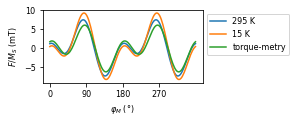

In [132]:
fig, ax = plt.subplots(figsize=(4,1.6),constrained_layout=True)

phim = np.linspace(0, 360, 180)


Fr = pm.FreeEnergy(k_canon={'phic': 0, 'phiu': phiu1-(phic1-45), 'kc': kc1, 'ku': ku1})
Fl = pm.FreeEnergy(k_canon={'phic': 0, 'phiu': phiu2-(phic2-45), 'kc': kc2, 'ku': ku2})
Ft = pm.FreeEnergy(k_canon={'phic': 0, 'phiu': 156, 'kc': -30.25, 'ku': 6.3})


fr = np.vectorize(F1)(np.radians(phim))
fl = np.vectorize(F2)(np.radians(phim))
ft = np.vectorize(Ft)(np.radians(phim))

ax.plot(phim,fr, label='295 K')
ax.plot(phim,fl, label='15 K')
ax.plot(phim,ft, label='torque-metry')

ax.set_xlabel(r'$\varphi_M$ ($\degree$)')
ax.set_ylabel(r'$F/M_S$ (mT)')

ax.set_xticks([0,90,180,270])

ax.legend(bbox_to_anchor=(1,1))

fig.savefig('out/cofe-funkcional.pdf')